## Title
Exercise: PCA 1

## Description
Goals:  To produce the plot below after PCA transformation (Using Scikit Learn) 

<img src="../fig/fig1.png" style="width: 500px;">

## Data Description

## Instructions:
Perform (i.e fit and transform) Principal Components Analysis (PCA) on the given dataset X

## Hints: 

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank">StandardScaler</a>

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit" target="_blank">PCA.fit()</a>
-Note that this is unsupervised learning method. 

**Note: **This exercise is auto-graded and you can try multiple attempts.



# PCA Exercise 1

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## Loading data

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

X = load_iris()

X_df = pd.DataFrame(data=X.data, columns=X.feature_names)

X_df['species'] = X.target

X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Standardize your $X$ matrix.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = X_df.drop(columns=['species'])
y = X_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)

X_train.shape, y_train.shape (105, 4) (105,)
X_test.shape, y_test.shape (45, 4) (45,)


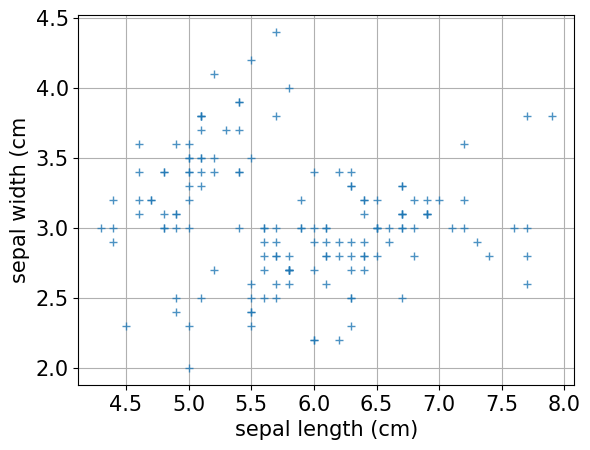

In [15]:
plt.plot(X_df.iloc[:,0], X_df.iloc[:,1], "+", alpha=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('sepal length (cm)', fontsize=15)
plt.ylabel('sepal width (cm', fontsize=15)
plt.grid()
plt.show()

## PCA
Transform your $X$ matrix using PCA with 2 components.

In [9]:
### edTest(test_PCA_fit) ###
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA train shape:", X_train_pca.shape)
print("PCA test shape:", X_test_pca.shape)

PCA train shape: (105, 2)
PCA test shape: (45, 2)


## Visualization

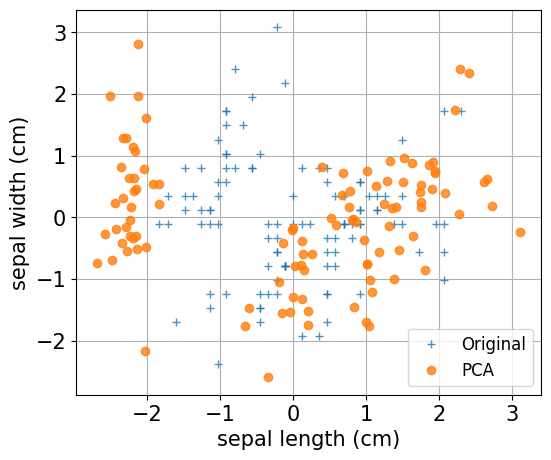

In [14]:
X_train_pca_length = np.array([x for x, y in zip(X_train_pca, y_train) if y == 0])
X_train_reduced_width = np.array([x for x, y in zip(X_train_pca, y_train) if y == 1])

plt.figure(figsize=(6, 5))

plt.plot(X_train[:, 0], X_train[:, 1], "+", alpha=0.8, label='Original')
plt.plot(X_train_pca[:, 0], X_train_pca[:, 1], "o", alpha=0.8, label='PCA')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('sepal length (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()